In [143]:
import sys
sys.path.append('../../')
import time
import pyVHR as vhr
from pyVHR.utils.errors import *
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
results_path = "C:\\Users\\20759193\\source\\repos\\pyVHR\\results"
gt_path = os.path.join(results_path, "groundtruth.json")
gt_df = pd.read_json(gt_path)
#gt_df.drop(columns=["ECG","ABP","CVP"], inplace=True)

In [74]:
# Drop the columns where the recording hasn't worked
gt_df = gt_df[gt_df['LENGTH'] % 300000 == 0]

C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\804726091.py:2: RuntimeWarning: Mean of empty slice
  ecg_means = [np.nanmean(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\804726091.py:3: RuntimeWarning: Mean of empty slice
  abp_means = [np.nanmean(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]
C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\804726091.py:4: RuntimeWarning: Mean of empty slice
  cvp_means = [np.nanmean(gt_df.iloc[i]["CVP_BPM"]) for i in range(len(gt_df))]
c:\Users\20759193\AppData\Local\anaconda3\envs\pyvhr\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


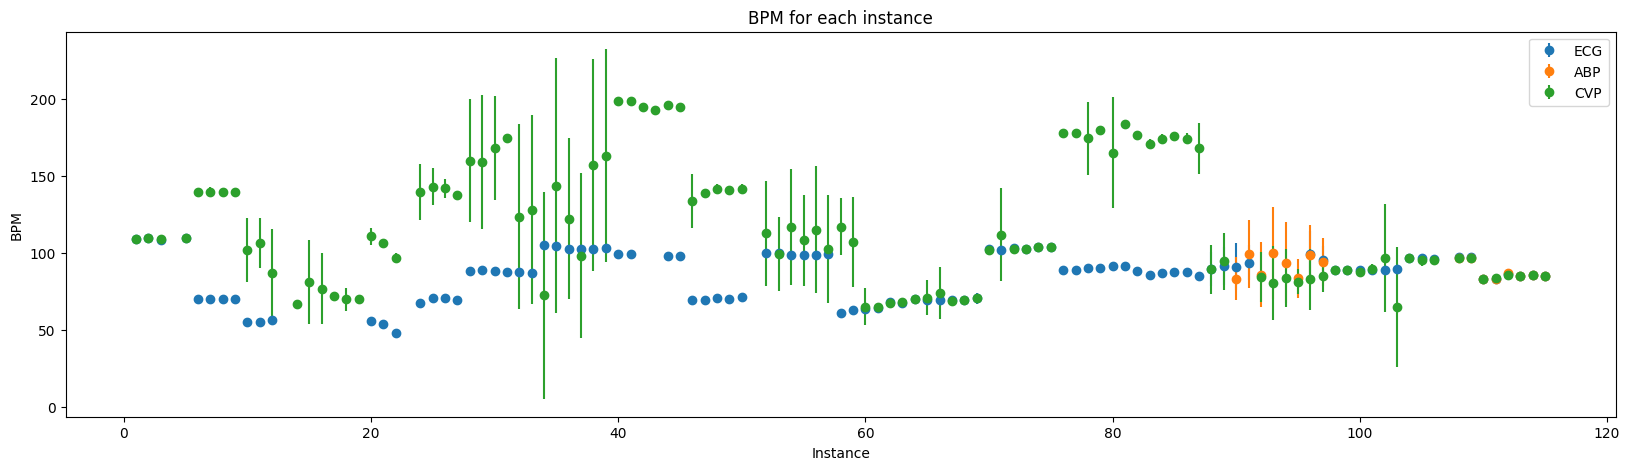

In [75]:
# Compute means
ecg_means = [np.nanmean(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
abp_means = [np.nanmean(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]
cvp_means = [np.nanmean(gt_df.iloc[i]["CVP_BPM"]) for i in range(len(gt_df))]

# Compute standard deviations
ecg_stds = [np.nanstd(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
abp_stds = [np.nanstd(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]
cvp_stds = [np.nanstd(gt_df.iloc[i]["CVP_BPM"]) for i in range(len(gt_df))]

# Scatter plots with error bars
plt.figure(figsize=(20,5))
plt.errorbar(gt_df["INSTANCE"], ecg_means, yerr=ecg_stds, fmt='o', label="ECG")
plt.errorbar(gt_df["INSTANCE"], abp_means, yerr=abp_stds, fmt='o', label="ABP")
plt.errorbar(gt_df["INSTANCE"], cvp_means, yerr=cvp_stds, fmt='o', label="CVP")

# Add legend
plt.title('BPM for each instance')
plt.xlabel('Instance')
plt.ylabel('BPM')
plt.legend()

# Display the plot
plt.show()

C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\1519336422.py:2: RuntimeWarning: Mean of empty slice
  ecg_means = [np.nanmean(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\1519336422.py:3: RuntimeWarning: Mean of empty slice
  abp_means = [np.nanmean(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]
C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\1519336422.py:4: RuntimeWarning: Mean of empty slice
  cvp_means = [np.nanmean(gt_df.iloc[i]["CVP_BPM"]) for i in range(len(gt_df))]


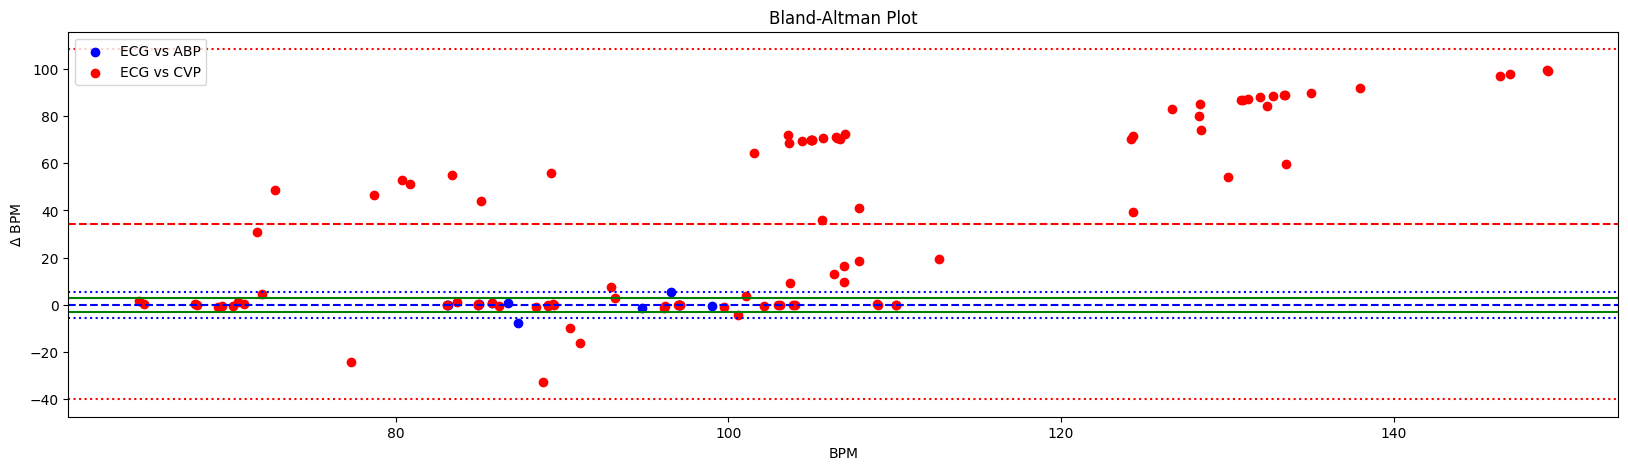

In [76]:
# Compute means
ecg_means = [np.nanmean(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
abp_means = [np.nanmean(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]
cvp_means = [np.nanmean(gt_df.iloc[i]["CVP_BPM"]) for i in range(len(gt_df))]

# Compute differences and means for ECG vs ABP and ECG vs CVP
diff_abp = [a - e for a, e in zip(abp_means, ecg_means)]
mean_abp = [(a + e)/2 for a, e in zip(abp_means, ecg_means)]

diff_cvp = [c - e for c, e in zip(cvp_means, ecg_means)]
mean_cvp = [(c + e)/2 for c, e in zip(cvp_means, ecg_means)]

# Plot Bland-Altman for ECG vs ABP
plt.figure(figsize=(20,5))
plt.scatter(mean_abp, diff_abp, color='blue', label="ECG vs ABP")
plt.axhline(np.nanmean(diff_abp), color='blue', linestyle='--')
plt.axhline(np.nanmean(diff_abp) + 1.96*np.nanstd(diff_abp), color='blue', linestyle=':')
plt.axhline(np.nanmean(diff_abp) - 1.96*np.nanstd(diff_abp), color='blue', linestyle=':')

# Plot Bland-Altman for ECG vs CVP
plt.scatter(mean_cvp, diff_cvp, color='red', label="ECG vs CVP")
plt.axhline(np.nanmean(diff_cvp), color='red', linestyle='--')
plt.axhline(np.nanmean(diff_cvp) + 1.96*np.nanstd(diff_cvp), color='red', linestyle=':')
plt.axhline(np.nanmean(diff_cvp) - 1.96*np.nanstd(diff_cvp), color='red', linestyle=':')
plt.axhline(3, color='green')
plt.axhline(-3, color='green')

# Add title, labels, and legend
plt.title('Bland-Altman Plot')
plt.xlabel('BPM')
plt.ylabel('$\Delta$ BPM')
plt.legend()

# Display the plot
plt.show()

C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\1110773318.py:2: RuntimeWarning: Mean of empty slice
  ecg_means = [np.nanmean(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
C:\Users\20759193\AppData\Local\Temp\ipykernel_10048\1110773318.py:3: RuntimeWarning: Mean of empty slice
  abp_means = [np.nanmean(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]


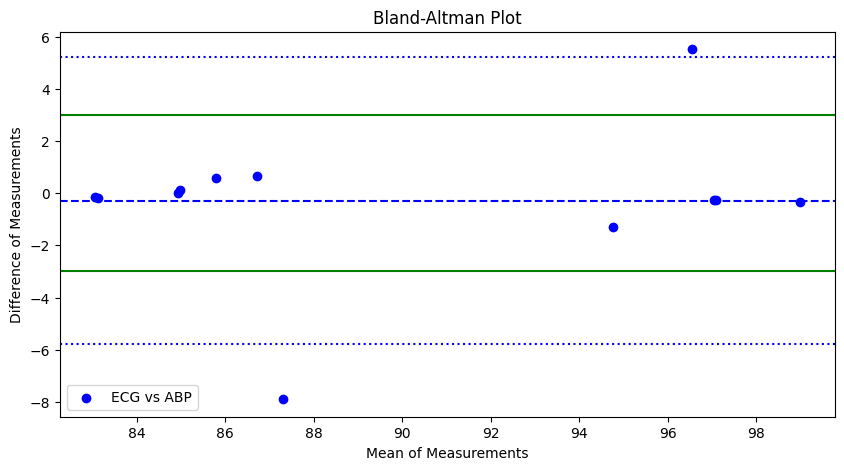

In [77]:
# Compute means
ecg_means = [np.nanmean(gt_df.iloc[i]["ECG_BPM"]) for i in range(len(gt_df))]
abp_means = [np.nanmean(gt_df.iloc[i]["ABP_BPM"]) for i in range(len(gt_df))]

# Compute differences and means for ECG vs ABP and ECG vs CVP
diff_abp = [a - e for a, e in zip(abp_means, ecg_means)]
mean_abp = [(a + e)/2 for a, e in zip(abp_means, ecg_means)]

# Plot Bland-Altman for ECG vs ABP
plt.figure(figsize=(10,5))
plt.scatter(mean_abp, diff_abp, color='blue', label="ECG vs ABP")
plt.axhline(np.nanmean(diff_abp), color='blue', linestyle='--')
plt.axhline(np.nanmean(diff_abp) + 1.96*np.nanstd(diff_abp), color='blue', linestyle=':')
plt.axhline(np.nanmean(diff_abp) - 1.96*np.nanstd(diff_abp), color='blue', linestyle=':')
plt.axhline(3, color='green')
plt.axhline(-3, color='green')


# Add title, labels, and legend
plt.title('Bland-Altman Plot')
plt.xlabel('Mean of Measurements')
plt.ylabel('Difference of Measurements')
plt.legend()

# Display the plot
plt.show()

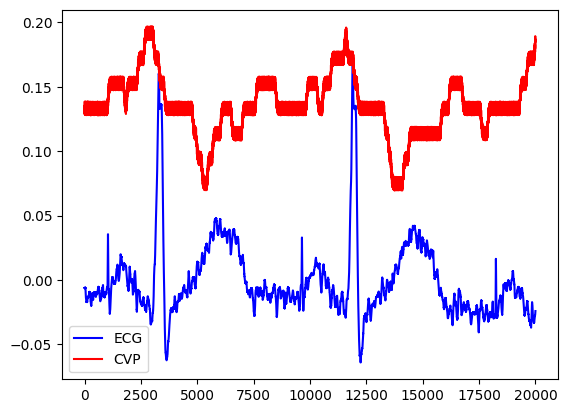

In [65]:
# Plot the "ECG" and "CVP" lineplots on the same axis using sns for row 60
ecg = np.array(gt_df.iloc[60]["ECG"][0][0:20000])*0.2
cvp = gt_df.iloc[60]["CVP"][0][0:20000]

sns.lineplot(data=ecg, label="ECG", color='blue')
sns.lineplot(data=cvp, label="CVP", color='red')
plt.legend()
plt.show()

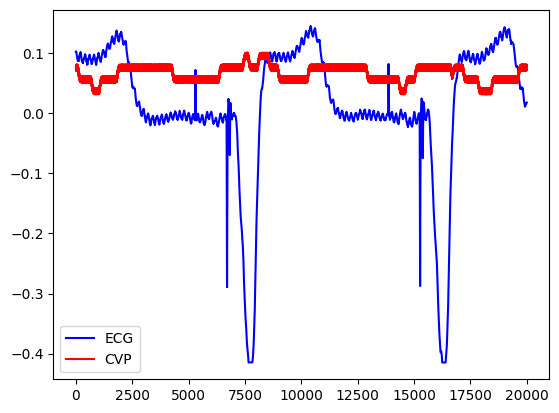

In [66]:
# Plot the "ECG" and "CVP" lineplots on the same axis using sns for row 60
ecg = np.array(gt_df.iloc[5]["ECG"][0][0:20000])
cvp = gt_df.iloc[5]["CVP"][0][0:20000]

sns.lineplot(data=ecg*0.2, label="ECG", color='blue')
sns.lineplot(data=cvp, label="CVP", color='red')
plt.legend()
plt.show()

## Useful Functions

In [142]:
def get_region_snr(bvp,fps,ref_hr):
    # Set up some variables
    interv1 = 0.2*60
    interv2 = 0.2*60
    NyquistF = fps/2.;
    FResBPM = 0.5
    nfft = np.ceil((60*2*NyquistF)/FResBPM)
    bvp = np.expand_dims(bvp,axis=0) # Expand the dimensions of the bvp so we can calculate the periodogram
    pfreqs, power = Welch(bvp,fps,nfft=nfft)
    power = np.squeeze(power,axis=0) # change the shape of the power so we can apply the boolean mask

    # Define the masks that is within 12bpm of the actual hr
    GTMask1 = np.logical_and(pfreqs>=ref_hr-interv1, pfreqs<=ref_hr+interv1)
    GTMask2 = np.logical_and(pfreqs>=(ref_hr*2)-interv2, pfreqs<=(ref_hr*2)+interv2)
    GTMask = np.logical_or(GTMask1, GTMask2)
    FMask = np.logical_not(GTMask)
    SPower = np.sum(power[GTMask])
    allPower = np.sum(power[FMask])
    snr = 10*np.log10(SPower/allPower)
    return snr

## Compare the CHROM methods for holistic raw between cameras

In [78]:
k1_path = os.path.join(results_path, "raw_holistic\\K1_raw_holistic_CHROM.json")
k2_path = os.path.join(results_path, "raw_holistic\\K2_raw_holistic_CHROM.json")

k1_df = pd.read_json(k1_path)
k2_df = pd.read_json(k2_path)

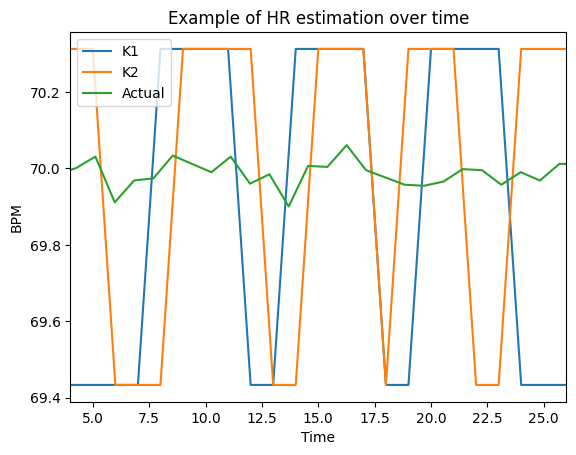

In [115]:
instance = 5
k1_times = k1_df.iloc[instance]["TIMES"]
k1_bpms = k1_df.iloc[instance]["BPMS"]
k2_times = k2_df.iloc[instance]["TIMES"]
k2_bpms = k2_df.iloc[instance]["BPMS"]
true_bpms = gt_df.iloc[instance]["ECG_BPM"]
true_times = gt_df.iloc[instance]["ECG_TIMES"]

sns.lineplot(x=k1_times,y=k1_bpms,label = "K1")
sns.lineplot(x=k2_times,y=k2_bpms,label = "K2")
sns.lineplot(x=true_times,y=true_bpms,label = "Actual")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.xlim((4,26))
plt.title("Example of HR estimation over time")
plt.legend()

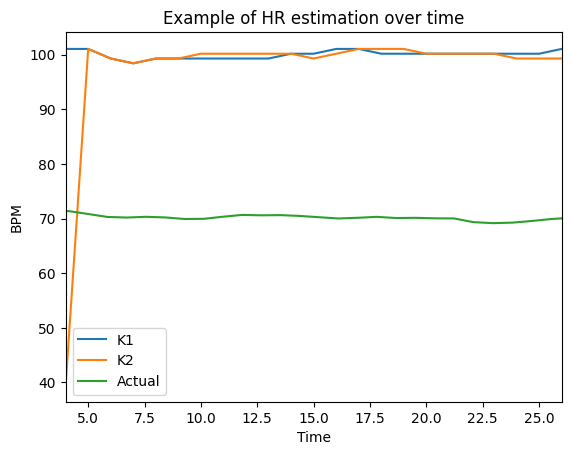

In [117]:
instance = 45
k1_times = k1_df.iloc[instance]["TIMES"]
k1_bpms = k1_df.iloc[instance]["BPMS"]
k2_times = k2_df.iloc[instance]["TIMES"]
k2_bpms = k2_df.iloc[instance]["BPMS"]
true_bpms = gt_df.iloc[instance]["ECG_BPM"]
true_times = gt_df.iloc[instance]["ECG_TIMES"]

sns.lineplot(x=k1_times,y=k1_bpms,label = "K1")
sns.lineplot(x=k2_times,y=k2_bpms,label = "K2")
sns.lineplot(x=true_times,y=true_bpms,label = "Actual")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.xlim((4,26))
plt.title("Example of HR estimation over time")
plt.legend()

In [141]:
k1_df["BPMS"].values.shape

(114,)

In [138]:
sns.boxplot(x=k1_df["INSTANCE"],y=k1_bpms)

c:\Users\20759193\AppData\Local\anaconda3\envs\pyvhr\lib\site-packages\numpy\lib\arraysetops.py:738: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


TypeError: unhashable type: 'list'

### Question: Is there much of a difference between cameras?